In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [3]:
train = pd.read_csv('Train.csv')
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
train['length'] = train['text'].apply(lambda x: len(x)-x.count(" "))

In [6]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

train['punct%'] = train['text'].apply(lambda x: count_punct(x))

In [7]:
train.head()

,text,label,length,punct%
0,I grew up (b. 1965) watching and loving the Th...,0,724,3.2
1,"When I put this movie in my DVD player, and sa...",0,1486,5.0
2,Why do people who do not know what a particula...,0,800,2.9
3,Even though I have great interest in Biblical ...,0,283,2.5
4,Im a die hard Dads Army fan and nothing will e...,1,806,5.7


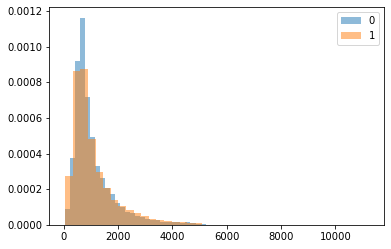

In [15]:
%matplotlib inline
plt.hist(train[train['label']==0]['length'], bins = 40, alpha=0.5, density=True, label='0')
plt.hist(train[train['label']==1]['length'], bins = 40, alpha=0.5, density=True, label='1')
plt.legend(loc='upper right')
plt.show()

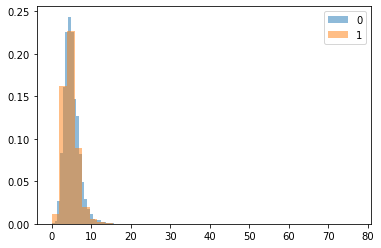

In [16]:
plt.hist(train[train['label']==0]['punct%'], bins = 40, alpha=0.5, density=True, label='0')
plt.hist(train[train['label']==1]['punct%'], bins = 40, alpha=0.5, density=True, label='1')
plt.legend(loc='upper right')
plt.show()

In [17]:
train['upper'] = train['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train.head()

,text,label,length,punct%,upper
0,I grew up (b. 1965) watching and loving the Th...,0,724,3.2,6
1,"When I put this movie in my DVD player, and sa...",0,1486,5.0,12
2,Why do people who do not know what a particula...,0,800,2.9,1
3,Even though I have great interest in Biblical ...,0,283,2.5,3
4,Im a die hard Dads Army fan and nothing will e...,1,806,5.7,3


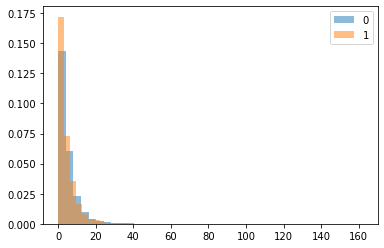

In [18]:
plt.hist(train[train['label']==0]['upper'], bins = 40, alpha=0.5, density=True, label='0')
plt.hist(train[train['label']==1]['upper'], bins = 40, alpha=0.5, density=True, label='1')
plt.legend(loc='upper right')
plt.show()

In [50]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [51]:
import re
import string
def preprocessing(text):
    emoji = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub('\W+', ' ', text.lower())
    emojis = " ".join(emoji).replace('-','')
    text += emojis
    text = [ps.stem(word) for word in text.split() if word not in stopwords]
    return text

In [52]:
preprocessing('I am so happy, :) , are u!!')

['happi', 'u:)']

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=preprocessing)
X_counts = count_vect.fit_transform(train['text'])
print(X_counts.shape)


(40000, 124547)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score


rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_counts, train['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)
#n_jobs = -1 is used so that processing is done in parallel and not individually

array([0.856625, 0.85625 , 0.8535  , 0.851375, 0.851375])